# 生成合适的地震动

In [1]:
# 创建合适的 0.12 g = 1.2
from StochasticGroundMotionModeling import StochasticGroundMotionModeling
from response_spectra import solve_nigam_jennings
import numpy as np
Ms = np.random.uniform(6, 8, 1000000)
flag = 0
ACC_set = np.zeros((30, 6001))
M_set = np.zeros(30)
Sa_set = np.zeros(30)
theta_i_set = np.zeros((30, 6))
for M in Ms:
    ACC, _, theta_i = StochasticGroundMotionModeling(M, R=20, Vs=1223, F=1)
    ag = ACC * 9.8
    zeta = 0.05
    dnt = 0.01
    omg = 2.0 * np.pi / 1.0
    _, _, Sa = solve_nigam_jennings(omg, zeta, ag, dnt)
    if (Sa > 3.00) and (Sa < 3.60):
        print(Sa, flag)
        ACC_set[flag, :] = ACC
        M_set[flag] = M
        Sa_set[flag] = Sa
        theta_i_set[flag, :] = theta_i
        flag += 1
    if flag >= 30:
        break

c:\ProgramData\miniconda3\envs\py310r\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess\StochasticGroundMotionModeling.py:140: RuntimeWarning: overflow encountered in square
  hjd2 = hid**2


3.4128582771292417 0
3.3840523720602986 1


c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess\StochasticGroundMotionModeling.py:139: RuntimeWarning: overflow encountered in multiply
  hid = wfid / np.sqrt(1 - kesi_f**2) * np.exp(-kesi_f * wfid * (t - ti[id - 1])) * np.sin(wfid * np.sqrt(1 - kesi_f**2) * (t - ti[id - 1]))
c:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess\StochasticGroundMotionModeling.py:139: RuntimeWarning: overflow encountered in exp
  hid = wfid / np.sqrt(1 - kesi_f**2) * np.exp(-kesi_f * wfid * (t - ti[id - 1])) * np.sin(wfid * np.sqrt(1 - kesi_f**2) * (t - ti[id - 1]))


3.0803564859049715 2
3.2366279049140085 3
3.1534143660391223 4
3.1311338649182403 5
3.164460502610302 6
3.5288973897732325 7
3.200156011665946 8
3.443368869138886 9
3.3459164989796784 10
3.1547428793158345 11
3.3816266038941154 12
3.0827479276440566 13
3.4685274374019985 14
3.480613674833967 15
3.126314109328258 16
3.0319387469776946 17
3.3293612710753915 18
3.4269343188781662 19
3.246667500458024 20
3.0870694518196675 21
3.000454606022239 22
3.509790595630463 23
3.5041081863636006 24
3.0638454752725166 25
3.0296872282895952 26
3.461846747433966 27
3.0940743346672357 28
3.414184741660065 29


In [2]:
np.savetxt('M.txt', M_set)
np.savetxt('Sa.txt', Sa_set)
np.savetxt('ACC.txt', ACC_set)
np.savetxt('theta.txt', theta_i_set)

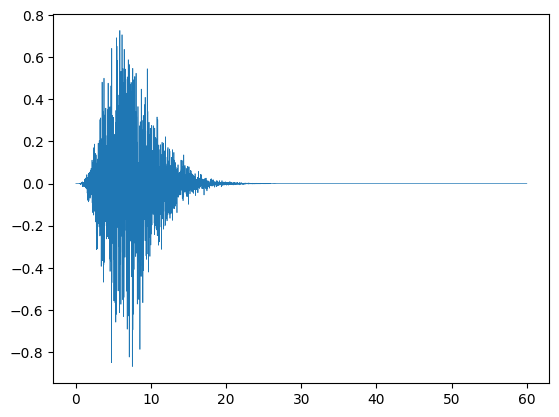

In [23]:
import matplotlib.pyplot as plt
t = np.arange(0, 60.01, 0.01)
plt.plot(t, ACC_set[28, :], lw=0.5)

In [11]:
from calculate_IA import calculate_IA
import numpy as np
ACC_set = np.loadtxt(r'C:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess\地震动\2475year71\ACC.txt')
Sa_set = np.loadtxt(r'C:\Users\12734\OneDrive\重要文件\2_SensitivityAnalysis\Sensitivity-PythonCode\sensitivity-code\ResilienceAssessment\MainProcess\地震动\2475year71\Sa.txt')
para = np.zeros((30, 3))
flag = 0
for ACC in ACC_set:
    Sa = Sa_set[flag]
    acc = ACC
    IA, D5_45, t_mid = calculate_IA(acc)
    para[flag, :] = np.array([IA, D5_45, t_mid])
    flag += 1

In [12]:
para

array([[ 0.08480806, 11.42      ,  6.13      ],
       [ 0.07523737, 11.68      , 13.28      ],
       [ 0.05812432,  8.98      ,  5.54      ],
       [ 0.06719491,  7.        ,  5.39      ],
       [ 0.04678615,  9.18      , 13.22      ],
       [ 0.05801406,  5.74      ,  1.94      ],
       [ 0.09009565,  4.91      ,  4.6       ],
       [ 0.05769975,  5.91      ,  6.11      ],
       [ 0.05594413,  5.94      ,  8.45      ],
       [ 0.03454803,  5.95      ,  2.3       ],
       [ 0.06435556,  5.14      ,  4.58      ],
       [ 0.06894041,  6.97      ,  7.7       ],
       [ 0.07469207,  5.05      ,  1.73      ],
       [ 0.09500619,  9.79      ,  8.24      ],
       [ 0.08104888, 14.55      , 11.04      ],
       [ 0.03951535,  5.45      ,  2.7       ],
       [ 0.0660148 ,  8.01      ,  2.59      ],
       [ 0.07761176,  8.33      ,  9.56      ],
       [ 0.12545727,  8.45      ,  9.39      ],
       [ 0.04971714,  5.76      ,  1.71      ],
       [ 0.07446078,  5.27      ,  2.44 

In [10]:
np.savetxt('para.txt', para)

In [1]:
import numpy as np
import multiprocessing as mp
import time
import func_generate_trainingset as fgt


if __name__ == '__main__':
    start_time = time.time()  # 记录开始时间
    num_processes = 16
    pool = mp.Pool(processes=num_processes)

    # 使用map来分配任务给不同进程，这里的参数是一个可迭代对象，例如range
    results = pool.map(fgt.FuncGenerateTrainingSet, range(num_processes))

    # 关闭进程池，防止新任务被提交
    pool.close()

    # 等待所有进程完成
    pool.join()
    # 将各个进程返回的元组拼接成一个大列表
    concatenated_result = []
    for result in results:
        concatenated_result.append(result)

    end_time = time.time()  # 记录结束时间
    elapsed_time = end_time - start_time  # 计算时间差
    print('计算时间为', elapsed_time, 's')

计算时间为 37751.470277786255 s


In [2]:
# 处理数组 concatenated_result


1

# 先抽样，再切片，再多进程

In [1]:
import numpy as np
import multiprocessing
import time
import func_generate_trainingset_nosgmm as fgt
import pyDOE2 as DOE
from scipy.stats.distributions import uniform, randint, truncnorm

if __name__ == '__main__':
    start_time = time.time()  # 记录开始时间
    # 创建试验
    num_samples = 1040  # 一定要是线程的倍数！！！！
    design = DOE.lhs(2, samples=num_samples, criterion='maximin')
    # 
    # design[:, 0] = uniform(6.0, 2.0).ppf(design[:, 0])  # M
    # design[:, 1] = uniform(10.0, 90.0).ppf(design[:, 1])  # R
    # design[:, 2] = uniform(600.0, 900.0).ppf(design[:, 2])  # V
    # design[:, 3] = randint(0, 2).ppf(design[:, 3])  # F
    # 抽样mb和kesi
    mu = 1  # 均值
    cv = 0.1  # 变异系数
    lower_bound = 0.872  # 下限
    upper_bound = 1.128  # 上限
    sigma = mu * cv  # 计算标准差
    # 计算截断正态分布的参数
    a = (lower_bound - mu) / sigma
    b = (upper_bound - mu) / sigma
    design[:, 0] = truncnorm(a, b, loc=mu, scale=sigma).ppf(design[:, 0])  # mb
    design[:, 1] = uniform(0.02, 0.05).ppf(design[:, 1])
    
    # 创建一个共享变量，用于存储各个线程的结果
    manager = multiprocessing.Manager()
    results = manager.list()
    num_threads = 16
    pool = multiprocessing.Pool(processes=num_threads)

    # 计算每个线程要处理的切片大小
    chunk_size = num_samples // num_threads

    # 在每个线程中处理对应切片的数据
    jobs = []
    for i in range(num_threads):
        start_index = i * chunk_size
        end_index = (i + 1) * chunk_size if i < num_threads - 1 else num_samples
        job = pool.apply_async(fgt.FuncGenerateTrainingSet, (design, results, start_index, end_index))
        jobs.append(job)

    # 等待所有线程完成
    for job in jobs:
        job.get()

    # 关闭进程池
    pool.close()
    pool.join()

    # 将所有线程的结果合并成一个列表
    final_results = list(results)
    
    end_time = time.time()  # 记录结束时间
    elapsed_time = end_time - start_time  # 计算时间差
    print('计算时间为', elapsed_time, 's')
    

计算时间为 17698.35374236107 s


In [2]:
import pickle
f = open('RESULT.pkl', 'wb')
pickle.dump(final_results, f)
f.close()

In [3]:
import pickle
f = open('RESULT.pkl', 'rb')
final = pickle.load(f)
f.close()
final

[(array([[1.69044453e-02, 1.89265196e-02, 1.14924190e-02, 2.07095755e+00,
          7.67377269e-01, 6.59970015e-01, 7.38822460e-01, 5.27515932e-03],
         [1.83584262e-02, 1.52004609e-02, 8.25708736e-03, 1.16714295e+00,
          5.95174666e-01, 5.85602002e-01, 6.27364068e-01, 5.06379085e-03],
         [3.04367397e-02, 2.28215402e-02, 1.16876379e-02, 1.90495036e+00,
          7.31062812e-01, 8.48494253e-01, 6.61943363e-01, 1.14487786e-02],
         [1.65806081e-02, 1.61398947e-02, 9.55125808e-03, 1.55094731e+00,
          5.06095900e-01, 6.17437019e-01, 5.83533476e-01, 1.56027801e-03],
         [3.01145851e-02, 2.32807520e-02, 1.20286918e-02, 2.36606126e+00,
          6.66159644e-01, 7.66403461e-01, 7.14332454e-01, 1.23901379e-02],
         [1.56434632e-02, 1.50008547e-02, 7.66942040e-03, 1.77828338e+00,
          5.53583098e-01, 5.16109250e-01, 5.49097691e-01, 5.01349880e-04],
         [1.77858133e-02, 1.55817097e-02, 8.87309550e-03, 1.25352008e+00,
          4.87227391e-01, 6.8316

In [4]:
# 解包元组并生成新的数组
array_list_1 = [tup[0] for tup in final_results]
array_list_2 = [tup[1] for tup in final_results]

# 将数组列表转换为二维NumPy数组
edpResult = np.array(array_list_1)
params = np.array(array_list_2)

edpResultnp = edpResult.reshape(num_threads*chunk_size, 8)
paramsnp = params.reshape(num_threads*chunk_size, 19)
np.savetxt('0915edpResult_2475year.txt', edpResultnp)
np.savetxt('0915params_2475year.txt', paramsnp)

In [ ]:
import multiprocessing

# 假设你有一个函数来处理单个抽样数据
def process_sample(sample):
    # 这里可以是你的处理逻辑，返回处理结果
    return sample * 2

def worker(samples, results, start_index, end_index):
    # 在每个线程中处理切片的抽样数据，并将结果存入results列表中
    thread_results = []
    for i in range(start_index, end_index):
        result = process_sample(samples[i])
        thread_results.append(result)
    results.extend(thread_results)

def main():
    num_samples = 1000
    num_threads = 16

    # 生成示例抽样数据，这里假设每个抽样数据是一个整数
    samples = list(range(num_samples))

    # 创建一个共享变量，用于存储各个线程的结果
    manager = multiprocessing.Manager()
    results = manager.list()

    pool = multiprocessing.Pool(processes=num_threads)

    # 计算每个线程要处理的切片大小
    chunk_size = num_samples // num_threads

    # 在每个线程中处理对应切片的数据
    jobs = []
    for i in range(num_threads):
        start_index = i * chunk_size
        end_index = (i + 1) * chunk_size if i < num_threads - 1 else num_samples
        job = pool.apply_async(worker, (samples, results, start_index, end_index))
        jobs.append(job)

    # 等待所有线程完成
    for job in jobs:
        job.get()

    # 关闭进程池
    pool.close()
    pool.join()

    # 将所有线程的结果合并成一个列表
    final_results = list(results)

    print(final_results)

if __name__ == "__main__":
    main()

In [5]:
from StochasticGroundMotionModeling import StochasticGroundMotionModeling
ACC, tn = StochasticGroundMotionModeling(6.69, 20.3, 1223, 1)
print(np.size(ACC))
ACC = ACC.tolist()
ACC.extend([0] * 1500)

5501


In [2]:
# 解包元组并生成新的数组
array_list_1 = [tup[0] for sublist in concatenated_result for tup in sublist]
array_list_2 = [tup[1] for sublist in concatenated_result for tup in sublist]

# 将数组列表转换为二维NumPy数组
edpResult = np.array(array_list_1)
params = np.array(array_list_2)

edpResultnp = edpResult.reshape(16*125, 8)
paramsnp = params.reshape(16*125, 19)
np.savetxt('0825edpResult.txt', edpResultnp)
np.savetxt('0825paramsnp.txt', paramsnp)

In [1]:
import numpy as np
import multiprocessing as mp
import time
import func_generate_trainingset as fgt


if __name__ == '__main__':
    start_time = time.time()  # 记录开始时间
    mp.set_start_method('spawn')
    # 创建一个进程间通信的队列
    queue = mp.Queue()
    # 创建进程并执行任务
    procs = []
    # np.random.seed(1)
    for i in range(16):
        # seed = np.random.randint(1000)  # 生成不同的随机种子
        proc = mp.Process(target=fgt.FuncGenerateTrainingSet, args=(queue,))
        procs.append(proc)
    # procs = [mp.Process(target=ReslienceAssessment, args=(queue,)) for _ in range(4)]
    for p in procs:
        p.start()
    # 等待所有进程执行完毕
    for p in procs:
        p.join()
    # 从队列中获得每个进程生成的列表并合并
    result = []
    while not queue.empty():
        result.extend(queue.get())
    # print(result)
    edpResult, params = zip(*result)
    print(edpResult)
    # np.savetxt('edpReuslt0823.txt', edpReuslt)
    print(params)
    # np.savetxt('params.txt', params)
    end_time = time.time()  # 记录结束时间
    elapsed_time = end_time - start_time  # 计算时间差
    print('计算时间为', elapsed_time, 's')

In [1]:
import func_generate_trainingset as fgt
import numpy as np
params = fgt.FuncGenerateTrainingSet()

0
10
20
30
40
50
60
70
80
90


(array([22., 23., 19., 14., 11.,  7.,  1.,  1.,  1.,  1.]),
 array([0.00661271, 0.01372429, 0.02083586, 0.02794744, 0.03505901,
        0.04217059, 0.04928216, 0.05639374, 0.06350532, 0.07061689,
        0.07772847]),
 <BarContainer object of 10 artists>)

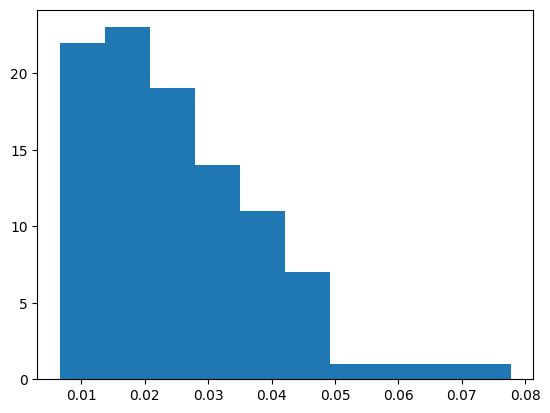

In [2]:
import matplotlib.pyplot as plt
plt.hist(params[:, 6])

In [11]:
edpResultnp = np.asarray(edpResult)
edpResultnp = edpResultnp.reshape(16, 8)
edpResultnp
np.savetxt('edpReuslt0823.txt', edpResultnp)

In [16]:
paramsnp = np.asarray(params)
paramsnp = paramsnp.reshape(16, 9)
paramsnp
np.savetxt('params0823.txt', paramsnp)